# WeatherPy
----



--------------
## this code takes about 2 minutes to run

In [66]:

## make sure the following dependencies are installed, specifically geopy
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import requests

from scipy import stats
import random as rd
from citipy import citipy
import csv
import os

#to import keys without having them in my repo, added the try block so it'll work for the grader
import sys
try:
    sys.path.insert(1,'/Users/Trav/Desktop/Coding/GitHub_Repositories/API_PACKAGE')
    import api_keys
except:
    import api_keys


## Generate Cities List

In [67]:

## generates 2 lists of random floats for latitude and longitude

samp_size = 1500
lat_list = [round(rd.uniform(-90,90),2) for num in range(samp_size)]
lon_list = [round(rd.uniform(-180,180),2) for num in range(samp_size)]

city_name_list=[]
country_code_list=[]
ex_coor_list=[]

#turns the keys and values from the world cities dict into lists
new_world_keys=list(citipy.WORLD_CITIES_DICT.keys())
new_world_values=list(citipy.WORLD_CITIES_DICT.values())

# generating data in a for loop
for y in range(samp_size):
    #grabs the approximate latitude and longitutde
    ap_lat=lat_list[y]
    ap_lon=lon_list[y]
    #use citipy functions to get the city name and country code
    current_city=citipy.nearest_city(ap_lat,ap_lon)
    city_name_list.append(current_city.city_name)
    country_code_list.append(current_city.country_code)
    # uses the new world lists to get the exact coordinates for the city
    nwvi=new_world_values.index(current_city)
    ex_coor_list.append(new_world_keys[nwvi])
 
# turns the lists created in the for loop into a dataframe
## i might want to remove the 2 for list comprehensions below and do it in the for loop above
coor_df= pd.DataFrame({
    'Approximate Lat':lat_list,
    'Approximate Lon':lon_list,
    'City Name':city_name_list,
    'Country Code': country_code_list,
    'Exact Coordinates':ex_coor_list,
    'Latitude':[i[0] for i in ex_coor_list],
    'Longitude':[i[1] for i in ex_coor_list],
})

#removes dupliactes based on the exact coordinates
coor_df=coor_df.drop_duplicates(subset=['Exact Coordinates'],keep='first')


### I could use coor_df instead of coor_df['Approximate Lat'] to get the length
#trims down the dataframe to 500 if there are more 
coor_df_len = len(coor_df['Approximate Lat'])
if coor_df_len > 500:
    coor_df.drop(coor_df.tail(coor_df_len-500).index,inplace=True)

# coor_df.head()


### Perform API Calls and turn raw data into dataframe
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
* Display the DataFrame

In [68]:

##sets up the query url for the lat/lon weather request #need to look into git ignore
base_url = "http://api.openweathermap.org/data/2.5/weather?"

coor_df['Temperature']=''
coor_df['Humidity']=''
coor_df['Cloudiness']=''
coor_df['Wind Speed']=''
coor_df['Max Temp']=''


for i,r in coor_df.iterrows():
    #gets the lat and lon from the df
    wea_coors = coor_df["Exact Coordinates"][i]
    wea_lat=wea_coors[0]
    wea_lon=wea_coors[1]
    #send api to requestthe temperature, humidity, cloudiness, and wind speed 
    query_url =f'{base_url}lat={wea_lat}&lon={wea_lon}&appid={api_keys.weather_api_key}&units=imperial'
    wea_json = requests.get(query_url).json()
    coor_df['Temperature'][i]=wea_json["main"]['temp']
    coor_df['Humidity'][i]=wea_json['main']['humidity']
    coor_df['Cloudiness'][i]=wea_json['clouds']['all']
    coor_df['Wind Speed'][i]=wea_json['wind']['speed']
    coor_df['Max Temp'][i]=wea_json["main"]['temp_max']

coor_df.head(20)



,Approximate Lat,Approximate Lon,City Name,Country Code,Exact Coordinates,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Max Temp
0,-31.36,60.51,saint-philippe,re,"(-21.35, 55.7666667)",-21.350000,55.766667,70.97,50,75,21.92,75.2
1,-74.85,19.80,bredasdorp,za,"(-34.532154, 20.040308)",-34.532154,20.040308,55.4,71,34,6.58,55.4
2,-16.77,-39.21,porto seguro,br,"(-16.433333, -39.083333)",-16.433333,-39.083333,75.2,83,0,6.93,75.2
3,-54.59,12.64,hermanus,za,"(-34.418696, 19.234464)",-34.418696,19.234464,59,70,0,4,59
4,-89.98,-161.79,mataura,pf,"(-23.3666667, -149.4666667)",-23.366667,-149.466667,67.78,91,100,21.03,67.78
5,22.95,-40.04,ponta do sol,cv,"(17.2, -25.1)",17.200000,-25.100000,77,69,40,35.57,77
6,37.66,113.42,yuci,cn,"(37.680278, 112.731944)",37.680278,112.731944,59,24,0,6.71,59
7,20.61,67.25,dwarka,in,"(22.239444, 68.967778)",22.239444,68.967778,85.87,37,0,10.8,85.87
8,-78.96,170.68,bluff,nz,"(-46.6, 168.333333)",-46.600000,168.333333,54,83,99,13,54
9,-53.75,38.56,port alfred,za,"(-33.590572, 26.891037)",-33.590572,26.891037,62.74,63,99,0.83,62.74


### Convert Dataframe to csv
* Export the city data into a .csv.


In [69]:
# #create a new folder and exports the dataframe

def dataframe_to_csv(df):
    current_directory=os.getcwd()
    new_folder_path =os.path.join(current_directory,r'Export Folder')
    if not os.path.exists(new_folder_path):
        os.makedirs(new_folder_path)
    csv_export_path = os.path.join(new_folder_path,'city_data.csv')
    df.to_csv(csv_export_path,index=False)
dataframe_to_csv(coor_df)

In [70]:
## import the csv file you just saved
def import_path():
    current_directory=os.getcwd()
    import_path.new_folder_path =os.path.join(current_directory,r'Export Folder')
    csv_export_path = os.path.join(import_path.new_folder_path,'city_data.csv')
    return csv_export_path

im_path=import_path()
print(im_path)
print(import_path.new_folder_path)
csv_imp_df=pd.read_csv(im_path,delimiter=',')
csv_imp_df.head()

c:\Users\Trav\Desktop\Coding\GitHub_Repositories\Weather_API\Weather\Export Folder\city_data.csv
c:\Users\Trav\Desktop\Coding\GitHub_Repositories\Weather_API\Weather\Export Folder


,Approximate Lat,Approximate Lon,City Name,Country Code,Exact Coordinates,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Max Temp
0,-31.36,60.51,saint-philippe,re,"(-21.35, 55.7666667)",-21.350000,55.766667,70.97,50,75,21.92,75.20
1,-74.85,19.80,bredasdorp,za,"(-34.532154, 20.040308)",-34.532154,20.040308,55.40,71,34,6.58,55.40
2,-16.77,-39.21,porto seguro,br,"(-16.433333, -39.083333)",-16.433333,-39.083333,75.20,83,0,6.93,75.20
3,-54.59,12.64,hermanus,za,"(-34.418696, 19.234464)",-34.418696,19.234464,59.00,70,0,4.00,59.00
4,-89.98,-161.79,mataura,pf,"(-23.3666667, -149.4666667)",-23.366667,-149.466667,67.78,91,100,21.03,67.78


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [71]:
## creates a new dataframe, excluding humidity over 100

print(len(csv_imp_df['Humidity']))
city_weather_df=csv_imp_df.loc[csv_imp_df['Humidity']<=100,:]
print(len(city_weather_df['Humidity']))

500
500


In [72]:
#### defines the plotting process as a function so it can be applied for each weather factor compared to latitude
def scatty(weathery):
    #set the x min and max and sets the data from the data frame as the x axis
    x_limit=round(city_weather_df[weathery].max()+(city_weather_df[weathery].max()*.1),-1)
    x_min=round((city_weather_df[weathery].min()-10),-1)
    x_axis=city_weather_df[weathery]

    # does the same as above for the y axis
    y_limit=round(city_weather_df['Latitude'].max()+(city_weather_df['Latitude'].max()*.1),-1)
    y_min=round((city_weather_df['Latitude'].min()-10),-1)
    y_axis = city_weather_df['Latitude']

    plt.scatter(x_axis,y_axis,marker='o',facecolors='blue',edgecolor='black')
    plt.ylim(y_min,y_limit)
    plt.xlim(x_min,x_limit)
    plt.title(weathery+" Vs Latitude")
    plt.xlabel(weathery)
    plt.ylabel('Latitude')
    ## exporting the file to a PNG
    ex_file_name=('scatter_'+weathery+"_vs_Lat.png")
    png_export=os.path.join(import_path.new_folder_path,ex_file_name)
    plt.savefig(png_export)

    return plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

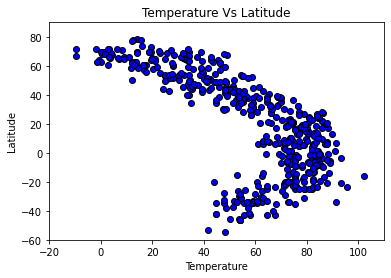

In [73]:
scatty('Temperature')
### need to write something to describe this plot

## Latitude vs. Humidity Plot

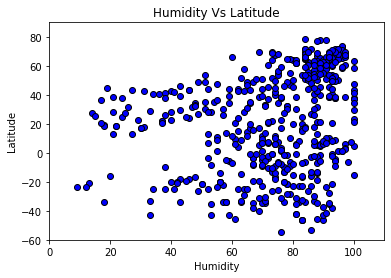

In [74]:
scatty('Humidity')
### need to write something to describe this plot

## Latitude vs. Cloudiness Plot

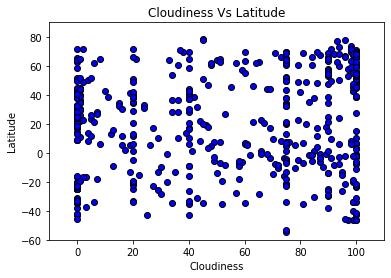

In [75]:
scatty('Cloudiness')
### need to write something to describe this plot
# mabe look at the mode her considering the vertical lines??????

## Latitude vs. Wind Speed Plot

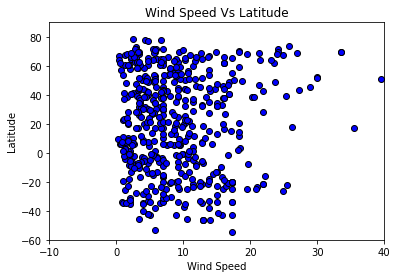

In [76]:
scatty('Wind Speed')
### need to write something to describe this plot

## Linear Regression

In [77]:


## splitting the dataframe in into 2 dataframe, north and south
north_df=city_weather_df.loc[city_weather_df["Latitude"]>=0,:]
south_df=city_weather_df.loc[city_weather_df["Latitude"]<0,:]


# set the linear regression plotting as a function
def plot_line_reg(df,weathery):
    #define x and y values to plot
    x_axis=df[weathery]
    y_axis=df["Latitude"]
    # get regression line stats and line equation
    slope, inter, rval, pval, std_err = stats.linregress(x_axis, y_axis)
    line_eq=f'y={round(slope,2)}x+{round(inter,2)}'

    # defines the line of best fit
    fit_line= slope * x_axis + inter
    plt.xlabel(weathery)
    plt.ylabel("Latitude")
    #sets the titles depending on the north vs south df
    if df['Latitude'].max()>=0:
        plt.title(weathery+" by Latitude in Northern Hemisphere")
        ex_file_name = ('Regress_Line_'+weathery+"_Lat_North.png")
    else:
        plt.title(weathery+" by Latitude in Southern Hemisphere")
        ex_file_name =('Regress_Line_'+weathery+"_Lat_South.png")
    plt.scatter(x_axis,y_axis,edgecolor='black')
    plt.plot(x_axis,fit_line,'--',color="black")
    ## sets the summary stats and analysis to be printed
    print_summary = f'The line equation is {line_eq}\nThe R Value is {round(rval,5)}\nThe P Value is {pval}\nThe SEM is {round(std_err,5)}'

    abs_r_val =abs(rval)
    if abs_r_val < 0.55 :
        analysis= f'since the R Value is {round(rval,5)}, the correlation is very low'
    elif abs_r_val < 0.6 :
        analysis= f'since the R Value is {round(rval,5)}, the correlation is low'
    elif abs_r_val < 0.7 :
        analysis= f'since the R Value is {round(rval,5)}, they are somewhat corrlated'
    elif abs_r_val < 0.8 :
        analysis= f'since the R Value is {round(rval,5)}, they are corrlated'
    elif abs_r_val < 0.9 :
        analysis= f'since the R Value is {round(rval,5)}, they are very corrlated'
    elif abs_r_val < 1 :
        analysis= f'since the R Value is {round(rval,5)}, they are extremely corrlated'   

    ##exports the plot to a png file
    png_export=os.path.join(import_path.new_folder_path,ex_file_name)
    plt.savefig(png_export)
    return print(print_summary),print(analysis),plt.show()



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The line equation is y=-0.75x+77.35
The R Value is -0.88404
The P Value is 1.0929354460170614e-112
The SEM is 0.02164
since the R Value is -0.88404, they are very corrlated


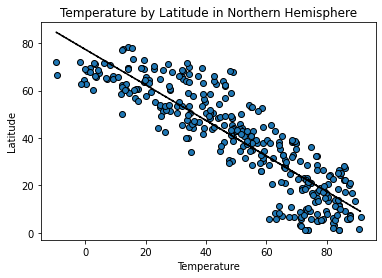

(None, None, None)

In [78]:
plot_line_reg(north_df,"Temperature")
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The line equation is y=0.74x+-73.56
The R Value is 0.70263
The P Value is 1.4251961101450793e-25
The SEM is 0.05925
since the R Value is 0.70263, they are corrlated


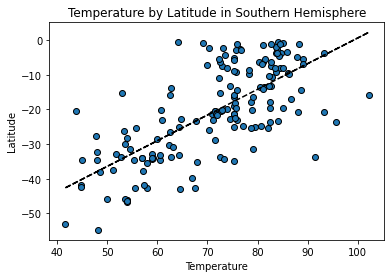

(None, None, None)

In [79]:
plot_line_reg(south_df,"Temperature")
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line equation is y=0.33x+15.22
The R Value is 0.32176
The P Value is 1.4823084693004776e-09
The SEM is 0.0524
since the R Value is 0.32176, the correlation is very low


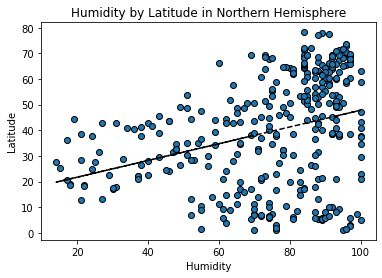

(None, None, None)

In [80]:
plot_line_reg(north_df,"Humidity")
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The line equation is y=0.06x+-24.87
The R Value is 0.0832
The P Value is 0.291015519954618
The SEM is 0.05808
since the R Value is 0.0832, the correlation is very low


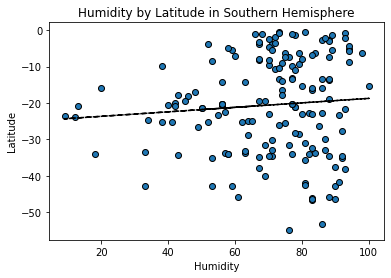

(None, None, None)

In [81]:
plot_line_reg(south_df,"Humidity")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line equation is y=0.16x+31.28
The R Value is 0.28088
The P Value is 1.5791274963297534e-07
The SEM is 0.02917
since the R Value is 0.28088, the correlation is very low


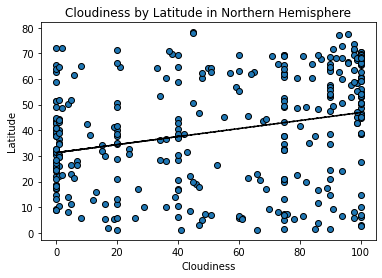

(None, None, None)

In [82]:
plot_line_reg(north_df,"Cloudiness")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The line equation is y=0.09x+-25.23
The R Value is 0.24231
The P Value is 0.0018306094265947935
The SEM is 0.02758
since the R Value is 0.24231, the correlation is very low


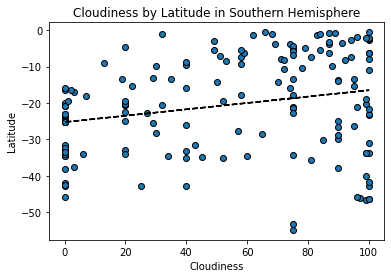

(None, None, None)

In [83]:
plot_line_reg(south_df,"Cloudiness")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line equation is y=0.5x+34.91
The R Value is 0.16244
The P Value is 0.0027816000361231778
The SEM is 0.16629
since the R Value is 0.16244, the correlation is very low


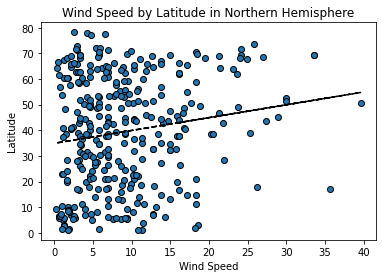

(None, None, None)

In [84]:
plot_line_reg(north_df,"Wind Speed")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The line equation is y=-0.37x+-17.2
The R Value is -0.15958
The P Value is 0.041869828576790266
The SEM is 0.18043
since the R Value is -0.15958, the correlation is very low


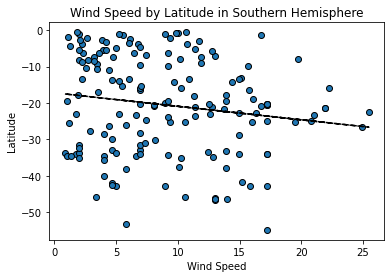

(None, None, None)

In [85]:
plot_line_reg(south_df,"Wind Speed")
